[tautan kode](https://colab.research.google.com/drive/1FgzprLeV_b_wp4yD2MoVdYLDXJSWhfYu?usp=sharing)

perintah dibawah bertujuan untuk mengimport/ memanggil library yang akan digunakan

In [ ]:
import cv2
from matplotlib import pyplot as plt
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from skimage import io
from tensorflow.keras.applications.resnet_v2 import preprocess_input as preprocess_resnetv2
import numpy as np
import os
from PIL import Image

perintah dibawah bertujuan untuk membuat variabel image yang akan berisikan gambar yang akan digunakan dengan direktori yang ada dan menampilkannya
gambar akan di baca dengan komposisi warna BGR

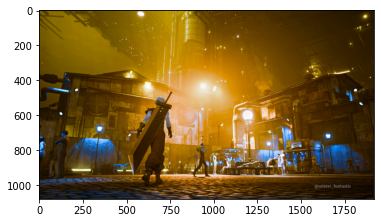

In [ ]:
image = cv2.imread('/content/drive/MyDrive/FF7_PHOTO/FF_7_REMAKE_10.jpg')
plt.imshow(image)

perintah dibawah bermaksud untuk mengubah komposisi warna BGR menjadi RGB

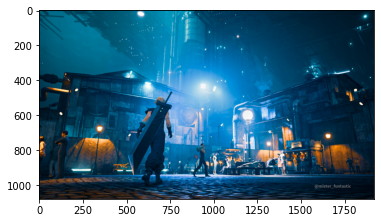

In [ ]:
image_cvtresult = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_cvtresult)

perintah dibawah dilakukan untuk memisahkan channel-channel citra dengan menggunakan metode .split()
dan hanya menampilkan citra dengan warna channel b

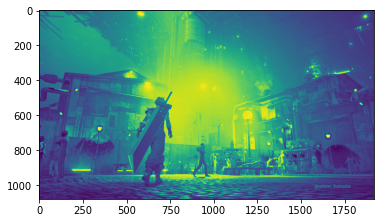

In [ ]:
r,g,b = cv2.split(image_cvtresult)
plt.imshow(b)

perintah dibawah bermaksud untuk menampilkan citra dalam bentuk array

In [ ]:
image_array = img_to_array(image_cvtresult)
print(image_array)

[[[ 0.  3.  6.]
  [ 0.  3.  6.]
  [ 0.  3.  6.]
  ...
  [ 0.  4.  7.]
  [ 1.  0.  0.]
  [40. 53. 69.]]

 [[ 6. 52. 68.]
  [ 7. 50. 67.]
  [ 6. 49. 66.]
  ...
  [ 0. 18. 25.]
  [ 0.  3.  3.]
  [37. 52. 75.]]

 [[ 1. 58. 77.]
  [ 1. 58. 77.]
  [ 0. 57. 76.]
  ...
  [ 1. 18. 28.]
  [ 0.  1.  2.]
  [34. 49. 70.]]

 ...

 [[ 1.  9. 12.]
  [ 1.  8. 14.]
  [ 3.  8. 14.]
  ...
  [11. 23. 35.]
  [ 0.  0.  2.]
  [16. 28. 42.]]

 [[ 3. 17. 28.]
  [ 2. 15. 23.]
  [ 1. 12. 14.]
  ...
  [ 7. 21. 34.]
  [ 0.  4. 10.]
  [16. 33. 51.]]

 [[ 0.  0.  2.]
  [ 0.  0.  0.]
  [ 1.  0.  0.]
  ...
  [ 0.  4.  8.]
  [ 1.  0.  0.]
  [20. 32. 44.]]]


perintah dibawah dilakukan untuk menampilkan citra dengan komposisi BGR,RGB, grayscale, HSV

<function matplotlib.pyplot.show>

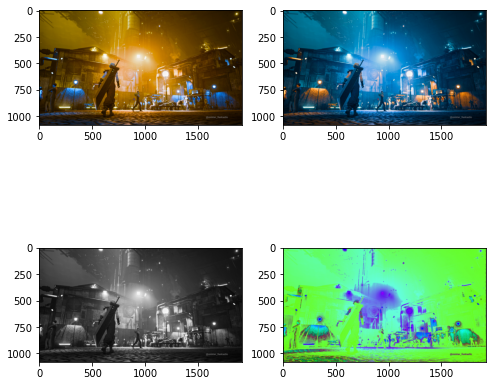

In [ ]:
fig = plt.figure(num = None, figsize=(8, 8))

image_grayscale_temp = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_grayscale = cv2.cvtColor(image_grayscale_temp, cv2. COLOR_GRAY2RGB)

image_hsv = cv2.cvtColor(image_cvtresult, cv2.COLOR_RGB2HSV)

ax = fig.add_subplot(2, 2, 1)
plt.imshow(image)

ax = fig.add_subplot(2, 2, 2)
plt.imshow(image_cvtresult)

ax = fig.add_subplot(2, 2, 3)
plt.imshow(image_grayscale)

ax = fig.add_subplot(2, 2, 4)
plt.imshow(image_hsv)

plt.show

perintah dibawah dilakukan untuk menampilkan histogram (grafik yang menggambarkan penyebaran nilai-nilai intensitas piksel dari suatu citra) dari code sebelumnya

<function matplotlib.pyplot.show>

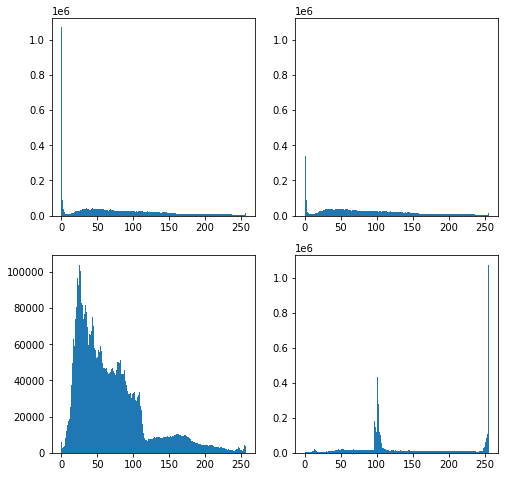

In [ ]:
fig = plt.figure(num = None, figsize=(8, 8))

image_grayscale_temp = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_grayscale = cv2.cvtColor(image_grayscale_temp, cv2. COLOR_GRAY2RGB)

image_hsv = cv2.cvtColor(image_cvtresult, cv2.COLOR_RGB2HSV)

ax = fig.add_subplot(2, 2, 1)
plt.hist(image.ravel(),256,[0,256])

ax = fig.add_subplot(2, 2, 2)
plt.hist(image_cvtresult.ravel(),256,[0,256])

ax = fig.add_subplot(2, 2, 3)
plt.hist(image_grayscale.ravel(),256,[0,256])

ax = fig.add_subplot(2, 2, 4)
plt.hist(image_hsv.ravel(),256,[0,256])

plt.show

perintah dibawah dilakukan untuk mengubah ukuran citra, agar ukuran citra seragam

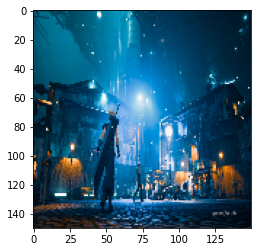

In [ ]:
image_resize = cv2.resize(image_cvtresult, (150, 150))
plt.imshow(image_resize)

membuat direktori 

In [ ]:
base_directory = '/content/'
augmented_directory = os.path.join(base_directory, "augmented_result")
os.mkdir(augmented_directory)

perintah dibawah untuk membuat variabel datagen, yang nantinya akan digunakan untuk melakukan proses augmentasi

In [ ]:
datagen = ImageDataGenerator(
    rotation_range = 45,
    width_shift_range = 0.5
)

perintah dibawah untuk mengambil data dari citra yang akan digunakan

In [ ]:
path = "/content/drive/MyDrive/FF7_PHOTO/"
size = 150
dataset = []
image_dir = os.listdir(path)

img = io.imread(f"{path}/{image_dir[0]}")
img = Image.fromarray(img, 'RGB')
img = img.resize((size, size))
dataset.append(np.array(img))
x = np.array(dataset)

perintah dibawah digunakan untuk mengambil data dari hasil augmentasi, dan dimasukkan pada direktori serta menyimpan citra dalam format png

In [ ]:
i = 0
for j in datagen.flow(x, batch_size = 32,
                      save_to_dir = "/content/augmented_result/",
                      save_prefix = "aug_rslt",
                      save_format = "png"):

  i += 1
  if i > 30:
    break

perintah dibawah dilakukan untuk mengurangi/reduksi noise pada citra

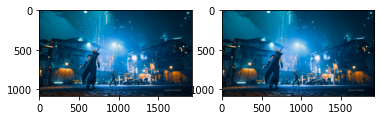

In [ ]:
image1 = cv2.GaussianBlur(image_cvtresult, (3,3), 0)
rgb_dst = cv2.fastNlMeansDenoisingColored(image1, None, 10, 10, 7, 21)

plt.subplot(121),plt.imshow(image_cvtresult)
plt.subplot(122),plt.imshow(rgb_dst)

plt.show()